# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [ ]:
A = integer_spiral(7)
print(A)

In [13]:
def integer_spiral_numpy(n):
    
    A = np.zeros((n, n))
    b = np.arange(1, n**2 + 1)
    A[n//2, n//2] = b[0]
    center = n//2
    for i in range(1,center+1):
        A[center-i, center-i:center+i] = b[((2*i-1)**2)+(2*i-1):((2*i-1)**2)-1:-1]
        A[center-i+1:center+i+1,center-i] = b[((2*i-1)**2)+(2*i):((2*i-1)**2)+(4*i)]
        A[center+i,center-i+1:center+i+1] = b[((2*i-1)**2)+(4*i):((2*i-1)**2)+(6*i)]
        A[center-i:center+i,center+i] = b[(2*i+1)**2-1:(2*i+1)**2-(2*i-1)-2:-1]
    return A
        
    

print(integer_spiral_numpy(11))

[[ 91.  90.  89.  88.  87.  86.  85.  84.  83.  82. 121.]
 [ 92.  57.  56.  55.  54.  53.  52.  51.  50.  81. 120.]
 [ 93.  58.  31.  30.  29.  28.  27.  26.  49.  80. 119.]
 [ 94.  59.  32.  13.  12.  11.  10.  25.  48.  79. 118.]
 [ 95.  60.  33.  14.   3.   2.   9.  24.  47.  78. 117.]
 [ 96.  61.  34.  15.   4.   1.   8.  23.  46.  77. 116.]
 [ 97.  62.  35.  16.   5.   6.   7.  22.  45.  76. 115.]
 [ 98.  63.  36.  17.  18.  19.  20.  21.  44.  75. 114.]
 [ 99.  64.  37.  38.  39.  40.  41.  42.  43.  74. 113.]
 [100.  65.  66.  67.  68.  69.  70.  71.  72.  73. 112.]
 [101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.]]


In [ ]:
%%timeit 
integer_spiral(2491)

In [ ]:
%%timeit
integer_spiral_numpy(2491)

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
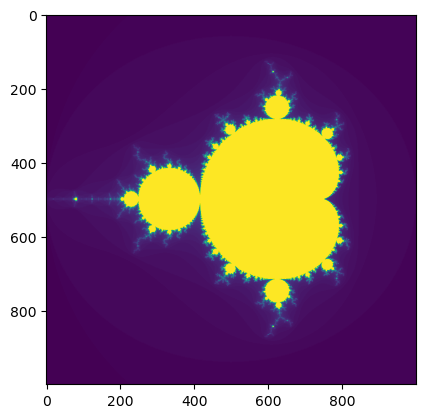

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [14]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    y = y * 1j
    C = np.meshgrid(x, y)
    Z = np.zeros((n,n))
    divergence_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            c = C[0][i][j] + C[1][i][j]
            z = 0
            for l in range(k):
                z = z**2 + c
                if abs(z) > 2:
                    divergence_matrix[i][j] = l
                    break
                else:
                    divergence_matrix[i][j] = k
    return divergence_matrix

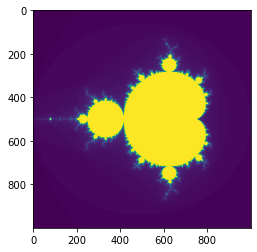

In [15]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [18]:
def is_prime(n):
    if n == 1:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True
    
def integer_spiral_numpy(n):
    
    A = np.zeros((n, n))
    b = np.arange(1, n**2 + 1)
    for i in range(n**2):
        if is_prime(b[i]) == False:
            b[i] = 0

    A[n//2, n//2] = 1
    center = n//2
    for i in range(1,center+1):
        A[center-i, center-i:center+i] = b[((2*i-1)**2)+(2*i-1):((2*i-1)**2)-1:-1]
        A[center-i+1:center+i+1,center-i] = b[((2*i-1)**2)+(2*i):((2*i-1)**2)+(4*i)]
        A[center+i,center-i+1:center+i+1] = b[((2*i-1)**2)+(4*i):((2*i-1)**2)+(6*i)]
        A[center-i:center+i,center+i] = b[(2*i+1)**2-1:(2*i+1)**2-(2*i-1)-2:-1]
    return A
        
    
print(integer_spiral_numpy(11))

[[  0.   0.  89.   0.   0.   0.   0.   0.  83.   0.   0.]
 [  0.   0.   0.   0.   0.  53.   0.   0.   0.   0.   0.]
 [  0.   0.  31.   0.  29.   0.   0.   0.   0.   0.   0.]
 [  0.  59.   0.  13.   0.  11.   0.   0.   0.  79.   0.]
 [  0.   0.   0.   0.   3.   2.   0.   0.  47.   0.   0.]
 [  0.  61.   0.   0.   0.   1.   0.  23.   0.   0.   0.]
 [ 97.   0.   0.   0.   5.   0.   7.   0.   0.   0.   0.]
 [  0.   0.   0.  17.   0.  19.   0.   0.   0.   0.   0.]
 [  0.   0.  37.   0.   0.   0.  41.   0.  43.   0. 113.]
 [  0.   0.   0.  67.   0.   0.   0.  71.   0.  73.   0.]
 [101.   0. 103.   0.   0.   0. 107.   0. 109.   0.   0.]]


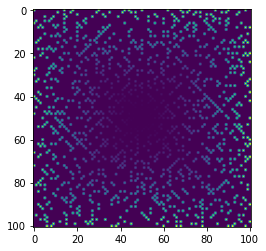

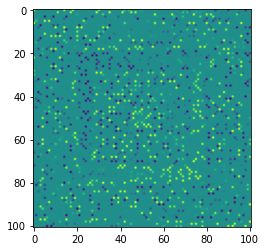

In [19]:
A = integer_spiral_numpy(101)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

In [25]:
def mandelbrot_set2(x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    y = y * 1j
    C = np.meshgrid(x, y)
    Z = np.zeros((n,n))
    divergence_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            c = 0.8*1j
            z = C[0][i][j] + C[1][i][j]
            for l in range(k):
                z = z**2 + c
                if abs(z) > 2:
                    divergence_matrix[i][j] = l
                    break
                else:
                    divergence_matrix[i][j] = k
    return divergence_matrix

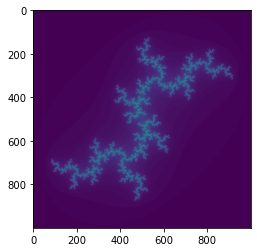

In [26]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set2(n=n, k=k)
plt.imshow(divergence_matrix)

In [ ]:
def mandelbrot_set3(x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    y = y * 1j
    C = np.meshgrid(x, y)
    Z = np.zeros((n,n))
    divergence_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            c = -0.5251993 -0.5251993*1j
            z = C[0][i][j] + C[1][i][j]
            for l in range(k):
                z = z**2 + c
                if abs(z) > 2:
                    divergence_matrix[i][j] = l
                    break
                else:
                    divergence_matrix[i][j] = k
    return divergence_matrix